In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np
import pytz

data = pd.read_csv('electricistan-national-energy-grid/train.csv')
data['datetime'] = pd.to_datetime(data['datetime'])



In [2]:
display(data.dtypes)

datetime    datetime64[ns]
power                int64
dtype: object

In [3]:
start_time = pd.to_datetime('2012-03-25 01:00:00')
end_time = pd.to_datetime('2012-03-25 04:00:00')

df_filtered = data.loc[data['datetime'].between(start_time, end_time, inclusive='both')]
display(df_filtered)


,datetime,power
8067,2012-03-25 01:00:00,3637
8068,2012-03-25 01:15:00,3622
8069,2012-03-25 01:30:00,3542
8070,2012-03-25 01:45:00,3483
8071,2012-03-25 03:00:00,3433
8072,2012-03-25 03:15:00,3374
8073,2012-03-25 03:30:00,3303
8074,2012-03-25 03:45:00,3300
8075,2012-03-25 04:00:00,3264


In [4]:
print(data['datetime'].dt.tz)
data.set_index('datetime', inplace=True)
display(data)

None


,power
datetime,
2012-01-01 00:15:00,3767
2012-01-01 00:30:00,3743
2012-01-01 00:45:00,3691
2012-01-01 01:00:00,3645
2012-01-01 01:15:00,3628
...,...
2022-09-14 22:45:00,4624
2022-09-14 23:00:00,4563
2022-09-14 23:15:00,4533


In [5]:
time_intervals = data.index.to_series().diff()
is_consistent_15min = all(time_interval == pd.Timedelta('15 minutes') for time_interval in time_intervals[1:])
if is_consistent_15min:
    print("The time series has a consistent 15-minute frequency.")
else:
    print("The time series does not have a consistent 15-minute frequency.")

The time series does not have a consistent 15-minute frequency.


In [6]:
data['Is_15_Min_Interval'] = time_intervals == pd.Timedelta('15 minutes')
data['Is_15_Min_Interval'] = data['Is_15_Min_Interval'].fillna(False)
data.loc[data.index[0], 'Is_15_Min_Interval'] = True
data['datetime'] = data.index
daysaving = data[data['Is_15_Min_Interval'] == False]
display(daysaving)

,power,Is_15_Min_Interval,datetime
datetime,,,
2012-03-25 03:00:00,3433,False,2012-03-25 03:00:00
2012-10-28 02:00:00,3307,False,2012-10-28 02:00:00
2013-03-31 03:00:00,3505,False,2013-03-31 03:00:00
2013-10-27 02:00:00,3190,False,2013-10-27 02:00:00
2014-03-30 03:00:00,3394,False,2014-03-30 03:00:00
2014-10-26 02:00:00,3309,False,2014-10-26 02:00:00
2015-03-29 03:00:00,3589,False,2015-03-29 03:00:00
2015-10-25 02:00:00,3451,False,2015-10-25 02:00:00
2016-03-27 03:00:00,3519,False,2016-03-27 03:00:00


In [7]:
daylight_saving_time = False
for index, row in data.iterrows():
    if not row['Is_15_Min_Interval'] and not daylight_saving_time:
        daylight_saving_time = True
        
    elif not row['Is_15_Min_Interval'] and daylight_saving_time:
        daylight_saving_time = False
    
    if daylight_saving_time:
        data.at[index,'daylight_saving'] = True
    else:
        data.at[index,'daylight_saving'] = False

display(data)
        
        

/tmp/ipykernel_14146/2288106684.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.at[index,'daylight_saving'] = False


,power,Is_15_Min_Interval,datetime,daylight_saving
datetime,,,,
2012-01-01 00:15:00,3767,True,2012-01-01 00:15:00,False
2012-01-01 00:30:00,3743,True,2012-01-01 00:30:00,False
2012-01-01 00:45:00,3691,True,2012-01-01 00:45:00,False
2012-01-01 01:00:00,3645,True,2012-01-01 01:00:00,False
2012-01-01 01:15:00,3628,True,2012-01-01 01:15:00,False
...,...,...,...,...
2022-09-14 22:45:00,4624,True,2022-09-14 22:45:00,True
2022-09-14 23:00:00,4563,True,2022-09-14 23:00:00,True
2022-09-14 23:15:00,4533,True,2022-09-14 23:15:00,True


In [8]:
start_time = pd.to_datetime('2012-03-25 01:00:00')
end_time = pd.to_datetime('2012-03-25 04:00:00')

df_filtered = data.loc[data['datetime'].between(start_time, end_time, inclusive='both')]
display(df_filtered)

,power,Is_15_Min_Interval,datetime,daylight_saving
datetime,,,,
2012-03-25 01:00:00,3637,True,2012-03-25 01:00:00,False
2012-03-25 01:15:00,3622,True,2012-03-25 01:15:00,False
2012-03-25 01:30:00,3542,True,2012-03-25 01:30:00,False
2012-03-25 01:45:00,3483,True,2012-03-25 01:45:00,False
2012-03-25 03:00:00,3433,False,2012-03-25 03:00:00,True
2012-03-25 03:15:00,3374,True,2012-03-25 03:15:00,True
2012-03-25 03:30:00,3303,True,2012-03-25 03:30:00,True
2012-03-25 03:45:00,3300,True,2012-03-25 03:45:00,True
2012-03-25 04:00:00,3264,True,2012-03-25 04:00:00,True


In [10]:
filtered_indices = data['daylight_saving'] == True
data.loc[filtered_indices,'datetime'] = data.loc[filtered_indices, 'datetime']- pd.to_timedelta(1, unit='h')

In [11]:
start_time = pd.to_datetime('2012-03-25 01:00:00')
end_time = pd.to_datetime('2012-03-25 04:00:00')

df_filtered = data.loc[data['datetime'].between(start_time, end_time, inclusive='both')]
display(df_filtered)

,power,Is_15_Min_Interval,datetime,daylight_saving
datetime,,,,
2012-03-25 01:00:00,3637,True,2012-03-25 01:00:00,False
2012-03-25 01:15:00,3622,True,2012-03-25 01:15:00,False
2012-03-25 01:30:00,3542,True,2012-03-25 01:30:00,False
2012-03-25 01:45:00,3483,True,2012-03-25 01:45:00,False
2012-03-25 03:00:00,3433,False,2012-03-25 02:00:00,True
2012-03-25 03:15:00,3374,True,2012-03-25 02:15:00,True
2012-03-25 03:30:00,3303,True,2012-03-25 02:30:00,True
2012-03-25 03:45:00,3300,True,2012-03-25 02:45:00,True
2012-03-25 04:00:00,3264,True,2012-03-25 03:00:00,True


In [ ]:
print(data['datetime'].dt.tz)
data.set_index('datetime', inplace=True)

In [1]:
start_date = '2012-01-01'
end_date = '2012-12-31'

subset_data = data[(data['datetime'] >= pd.to_datetime(start_date)) & (data['datetime'] <= pd.to_datetime(end_date))].copy()
subset_data.set_index('datetime', inplace=True)
display(subset_data)

NameError: name 'data' is not defined

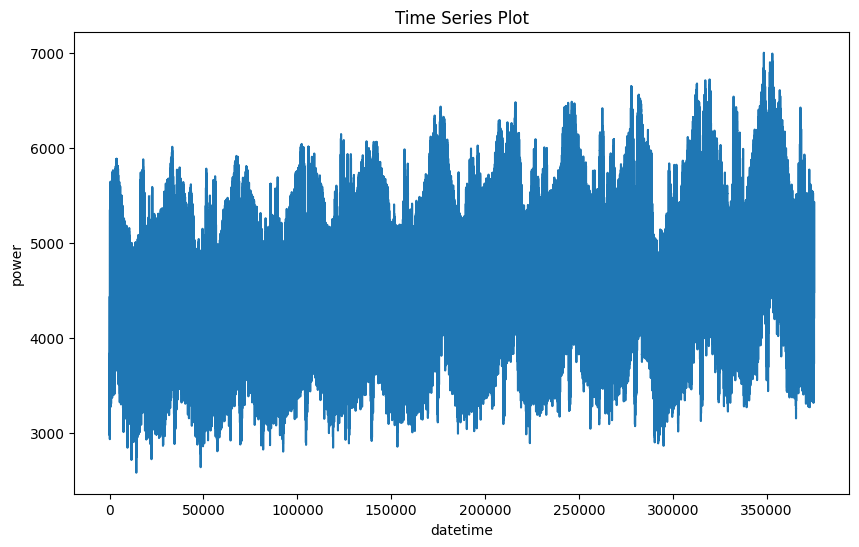

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(data['power'])
plt.xlabel('datetime')
plt.ylabel('power')
plt.title('Time Series Plot')
plt.show()

In [7]:
data['First_Difference'] = data['power'].diff()
display(data)

,datetime,power,First_Difference
0,2012-01-01 00:15:00,3767,NaN
1,2012-01-01 00:30:00,3743,-24.0
2,2012-01-01 00:45:00,3691,-52.0
3,2012-01-01 01:00:00,3645,-46.0
4,2012-01-01 01:15:00,3628,-17.0
...,...,...,...
375350,2022-09-14 22:45:00,4624,-32.0
375351,2022-09-14 23:00:00,4563,-61.0
375352,2022-09-14 23:15:00,4533,-30.0
375353,2022-09-14 23:30:00,4512,-21.0


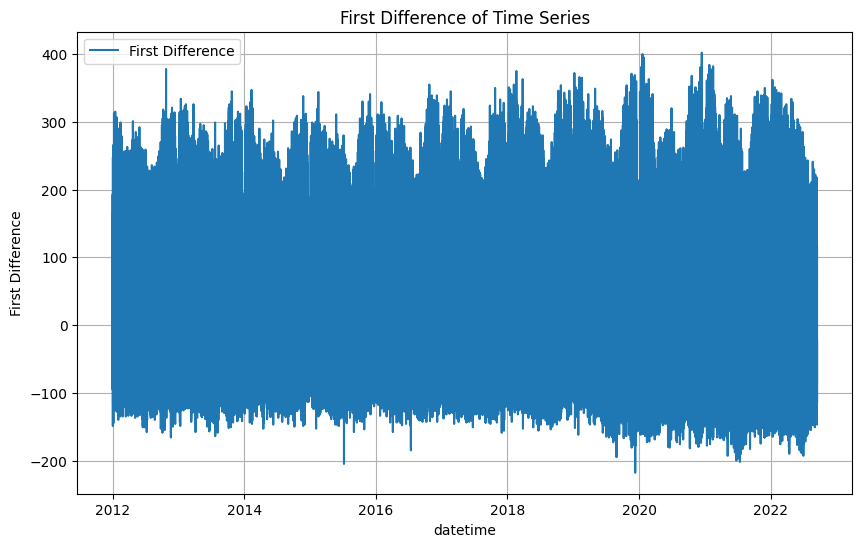

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(data['datetime'], data['First_Difference'], label='First Difference')
plt.xlabel('datetime')
plt.ylabel('First Difference')
plt.title('First Difference of Time Series')
plt.legend()
plt.grid(True)
plt.show()

In [11]:

decomposition = sm.tsa.seasonal_decompose(data['power'], model='additive', freq='15T')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['power'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [12]:
print(pd.__version__)

2.1.2
